In [115]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [116]:
df = pd.read_csv('E:/AI Practice/Dataset/GE.csv',index_col='Date')

In [117]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2/27/2023,84.000000,84.860001,83.489998,83.839996,83.587776,6390500
2/28/2023,83.620003,85.650002,83.459999,84.709999,84.455154,9131000
3/1/2023,84.660004,85.360001,83.750000,84.139999,83.886871,5996000
3/2/2023,83.599998,85.730003,83.379997,85.720001,85.462120,6820700
3/3/2023,85.900002,87.040001,85.150002,86.379997,86.120132,7676600
...,...,...,...,...,...,...
2/16/2024,148.949997,150.360001,148.509995,149.160004,149.160004,6874700
2/20/2024,149.020004,150.339996,147.820007,148.619995,148.619995,5719100
2/21/2024,148.470001,149.389999,147.660004,149.070007,149.070007,4233700


In [118]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [119]:
df.index = pd.to_datetime(df.index)

In [120]:
df.index

DatetimeIndex(['2023-02-27', '2023-02-28', '2023-03-01', '2023-03-02',
               '2023-03-03', '2023-03-06', '2023-03-07', '2023-03-08',
               '2023-03-09', '2023-03-10',
               ...
               '2024-02-09', '2024-02-12', '2024-02-13', '2024-02-14',
               '2024-02-15', '2024-02-16', '2024-02-20', '2024-02-21',
               '2024-02-22', '2024-02-23'],
              dtype='datetime64[ns]', name='Date', length=250, freq=None)

In [121]:
cols = list(df)[0:5]

In [122]:
cols

['Open', 'High', 'Low', 'Close', 'Adj Close']

In [123]:
df_for_training = df[cols].astype(float)

In [124]:
df_for_training

,Open,High,Low,Close,Adj Close
Date,,,,,
2023-02-27,84.000000,84.860001,83.489998,83.839996,83.587776
2023-02-28,83.620003,85.650002,83.459999,84.709999,84.455154
2023-03-01,84.660004,85.360001,83.750000,84.139999,83.886871
2023-03-02,83.599998,85.730003,83.379997,85.720001,85.462120
2023-03-03,85.900002,87.040001,85.150002,86.379997,86.120132
...,...,...,...,...,...
2024-02-16,148.949997,150.360001,148.509995,149.160004,149.160004
2024-02-20,149.020004,150.339996,147.820007,148.619995,148.619995
2024-02-21,148.470001,149.389999,147.660004,149.070007,149.070007


In [125]:
df_for_training = df.reset_index(drop=True)

In [126]:
df_for_training

,Open,High,Low,Close,Adj Close,Volume
0,84.000000,84.860001,83.489998,83.839996,83.587776,6390500
1,83.620003,85.650002,83.459999,84.709999,84.455154,9131000
2,84.660004,85.360001,83.750000,84.139999,83.886871,5996000
3,83.599998,85.730003,83.379997,85.720001,85.462120,6820700
4,85.900002,87.040001,85.150002,86.379997,86.120132,7676600
...,...,...,...,...,...,...
245,148.949997,150.360001,148.509995,149.160004,149.160004,6874700
246,149.020004,150.339996,147.820007,148.619995,148.619995,5719100
247,148.470001,149.389999,147.660004,149.070007,149.070007,4233700
248,149.850006,152.250000,149.850006,151.669998,151.669998,4591400


In [127]:
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

In [128]:
df_for_training_scaled

array([[-2.03584142, -2.04771983, -2.00172806, -2.03738134, -2.03684862,
         0.39024351],
       [-2.06386274, -1.98977693, -2.00393677, -1.97395809, -1.97391298,
         1.41299749],
       [-1.98717214, -2.01104716, -1.98258511, -2.01551111, -2.01514674,
         0.2430162 ],
       ...,
       [ 2.71823381,  2.68525517,  2.72286428,  2.71788884,  2.71444364,
        -0.41467376],
       [ 2.81999661,  2.89502293,  2.88410576,  2.90742828,  2.90309508,
        -0.2811802 ],
       [ 2.97853908,  3.00870844,  3.03577554,  3.02844263,  3.02354248,
         0.10974656]])

# Initialize empty lists to store training data

In [129]:
trainX = []
trainY = []

In [130]:
n_future = 1
n_past = 14

In [131]:
#x=len(df_for_training_scaled)
#x

In [132]:
for i in range (n_past, len(df_for_training_scaled) - n_future+1):
    trainX.append(df_for_training_scaled[i-n_past:i, 0:df_for_training_scaled.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future-1:i+n_future,0])

In [133]:
trainX, trainY = np.array(trainX), np.array(trainY)
print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (236, 14, 6).
trainY shape == (236, 1).


# define autoencoder model

In [134]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

c:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_10 (LSTM)                  │ (None, 14, 64)         │        18,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,625 (119.63 KB)

 Trainable params: 30,625 (119.63 KB)

 Non-trainable params: 0 (0.00 B)

In [135]:
history = model.fit(trainX, trainY, epochs=10,batch_size=19, validation_split=0.3, verbose=1)

Epoch 1/10


9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 0.4434 - val_loss: 1.7579
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1452 - val_loss: 0.9203
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0570 - val_loss: 0.2047
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0531 - val_loss: 0.1525
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0430 - val_loss: 0.1933
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0355 - val_loss: 0.3153
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0254 - val_loss: 0.3591
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0286 - val_loss: 0.3629
Epoch 9/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0289 - val_loss: 0.4688
Epoch 10/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0355 - val_loss: 0.4172


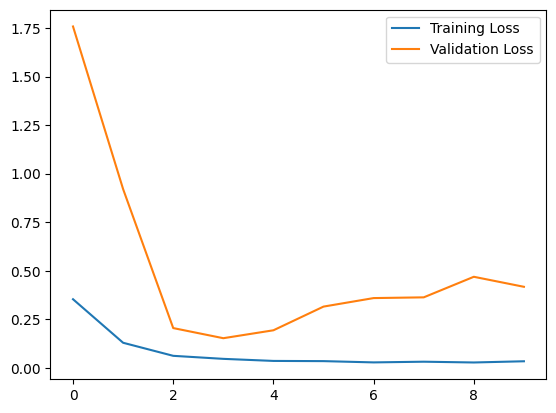

In [136]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()

